<a href="https://colab.research.google.com/github/K-Kalae/CS50P/blob/main/HW_1_Sample_Statistics_%26_Data_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW 1 - Sample Statistics & Data Visualization

## Deliverables

- Link to google colab notebook
    > Instructions:
    Click the **share** button in the upper right hand corner and select '**Anyone with the link**'  under the **general restriction** section.

## Dataset Description & Info

Our dataset includes a sample of over 40,000 crashes in Tri-County Florida (Miami-Dade, Broward, Palm Beach) for the year 2020. It has over 150 columns (or fields) that provide us the data from each crash report. Many of the columns have coded data which means each number represents a distinct category, you can find the full list of fields and their codes here: [Fields & Codes](https://gis.fdot.gov/ssogis/docs/MapCodeTableDefinitions.xlsx)

How to access dataset file:
- Download the CSV file from canvas [here](https://canvas.fau.edu/files/32090294/download?download_frd=1).
- Raw CSV data link [here](https://raw.githubusercontent.com/cam-alvarez/Personal-Portfolio-and-Blog/main/public/2020-tristatecounty-crashdata.csv).

Instructions on how to load dataset via either of these two methods are in the next section.

## Load Dataset and Libraries

In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Loading CSV File

In [5]:
# Import necessary libraries for upload and dataframe conversion
from google.colab import files
import io

# Run and select file to upload
file = files.upload()

Saving 2020-tristatecounty-crashdata.csv to 2020-tristatecounty-crashdata.csv


In [6]:
# Covert to dataframe object
df1 = pd.read_csv(io.BytesIO(file['2020-tristatecounty-crashdata.csv']))

<ipython-input-6-84379052bf62>:2: DtypeWarning: Columns (25,152) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv(io.BytesIO(file['2020-tristatecounty-crashdata.csv']))


In [7]:
# Fixing warning by reloading our dataset with low_memory parameter set to false
df1 = pd.read_csv('2020-tristatecounty-crashdata.csv', low_memory=False)

In [8]:
# Checking upload by displaying the first few rows of the dataframe
print(df1.head())

   OBJECTID            XID  CALENDAR_YEAR  CRASH_NUMBER     CASE_NUMBER  \
0     46260  2020240008560           2020     240008560  SW200418002763   
1     46262  2020240009300           2020     240009300  SW200623004004   
2     46263  2020240008950           2020     240008950  SW200526003407   
3     46264  2020240009370           2020     240009370  SW200627004094   
4     46265  2020240009390           2020     240009390  SW200630004129   

   INVSTGT_AGCY_CD          AGENCY_TYPE_TXT  DOT_GEOG_DIST_CD  DOT_CNTY_CD  \
0                2  COUNTY SHERIFF'S OFFICE                 6           87   
1                2  COUNTY SHERIFF'S OFFICE                 6           87   
2                2  COUNTY SHERIFF'S OFFICE                 6           87   
3                2  COUNTY SHERIFF'S OFFICE                 6           87   
4                2  COUNTY SHERIFF'S OFFICE                 6           87   

   COUNTY_TXT  ... DST_TOXTRMNODB_NUM   LATITUDE  LONGITUDE   X_COORDINATE  \
0 

### Loading Raw CSV Data from Link

In [9]:
# URL to the CSV file
url = 'https://raw.githubusercontent.com/cam-alvarez/Personal-Portfolio-and-Blog/main/public/2020-tristatecounty-crashdata.csv'

# Read the CSV file from the URL
df2 = pd.read_csv(url)

<ipython-input-9-8a268b89ff56>:5: DtypeWarning: Columns (25,152) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv(url)


In [10]:
# Fixing warning by reloading our dataset with low_memory parameter set to false
df2 = pd.read_csv(url, low_memory=False)

In [11]:
# Checking upload by displaying the first few rows of the dataframe
print(df2.head())

   OBJECTID            XID  CALENDAR_YEAR  CRASH_NUMBER     CASE_NUMBER  \
0     46260  2020240008560           2020     240008560  SW200418002763   
1     46262  2020240009300           2020     240009300  SW200623004004   
2     46263  2020240008950           2020     240008950  SW200526003407   
3     46264  2020240009370           2020     240009370  SW200627004094   
4     46265  2020240009390           2020     240009390  SW200630004129   

   INVSTGT_AGCY_CD          AGENCY_TYPE_TXT  DOT_GEOG_DIST_CD  DOT_CNTY_CD  \
0                2  COUNTY SHERIFF'S OFFICE                 6           87   
1                2  COUNTY SHERIFF'S OFFICE                 6           87   
2                2  COUNTY SHERIFF'S OFFICE                 6           87   
3                2  COUNTY SHERIFF'S OFFICE                 6           87   
4                2  COUNTY SHERIFF'S OFFICE                 6           87   

   COUNTY_TXT  ... DST_TOXTRMNODB_NUM   LATITUDE  LONGITUDE   X_COORDINATE  \
0 

# Question 1

To start our investigation of this dataset, it would be useful to know some basic numbers on the frequency of crashes on the overall dataset and between counties. Doing so may point towards certain trends we might want to investigate further. We will start by creating histograms of the number of crashes per month over our entire dataset and then by county. We will then calculate some sample statistics on the number of crashes per month. Afterward, we will summarize our findings.

```
Fields:
  - Month (MONTH)
  - County (COUNTY_TXT)
```

1(a): Histogram of overall number of crashes per month

1(b): Calculate the mean, median, quartiles, and standard deviation for the number of crashes per month of the overall dataset.

1(c): Histograms of overall number of crashes per month by county.

1(d): Calculate the mean, median, quartiles, and standard deviation for the number of crashes per month for each county.

1(e): Report your findings and conclusions based on the histograms and calculated sample statistics.

## Answers & Code

### 1(a): Histogram of overall number of crashes per month

0    4
1    6
2    5
3    6
4    6
Name: month, dtype: int64


(array([14528.,  5131.,  2113.,  3210.,  3465.,  3451.,  3495.,  3516.,
         1392.,  2136.]),
 array([ 1. ,  2.1,  3.2,  4.3,  5.4,  6.5,  7.6,  8.7,  9.8, 10.9, 12. ]),
 <BarContainer object of 10 artists>)

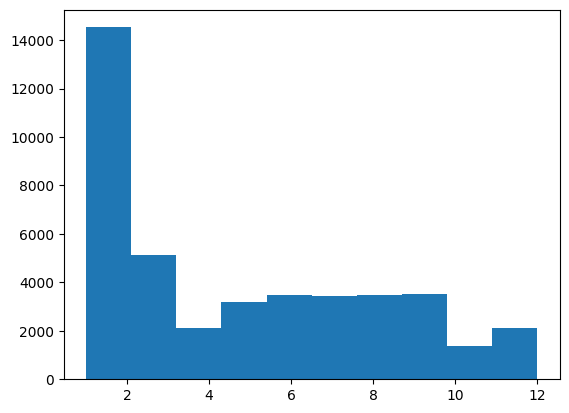

In [12]:
df1["CRASH_DATE"] = pd.to_datetime(df1["CRASH_DATE"])
# Extract the month and create a new column
df1['month'] = df1['CRASH_DATE'].dt.month
# Display the DataFrame with the new 'month' column
print(df1['month'].head())

# Plot the histogram
plt.hist(df1["month"])

### 1(b): Sample statistics on the overall dataset

In [13]:
number_crashes_per_month = df1["month"].value_counts()
mean_value = number_crashes_per_month.mean()
median_value = number_crashes_per_month.median()
quartiles = number_crashes_per_month.quantile([0.25, 0.5, 0.75])
std_deviation = number_crashes_per_month.std()

# Display the results
print("Mean:", mean_value)
print("Median:", median_value)
print("Quartiles:")
print(quartiles)
print("Standard Deviation:", std_deviation)

Mean: 3536.4166666666665
Median: 3458.0
Quartiles:
0.25    1932.75
0.50    3458.00
0.75    3919.75
Name: month, dtype: float64
Standard Deviation: 2117.4722691468855


### 1(c): Histograms of overall number of crashes per month by county.

1(c.1): Histogram for Miami-Dade County.

Text(0.5, 0, 'Miami-Dade County')

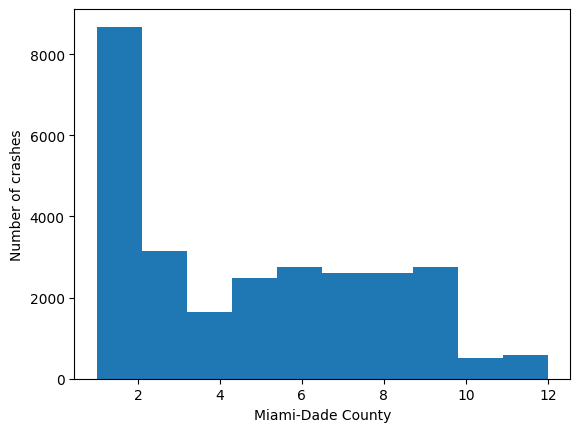

In [14]:
df_mdc = df1[df1['COUNTY_TXT']== "MIAMI-DADE"]
plt.hist(df_mdc["month"])
plt.ylabel("Number of crashes")
plt.xlabel("Miami-Dade County")

1(c.2): Histogram for Broward County.

Text(0.5, 0, 'Broward County')

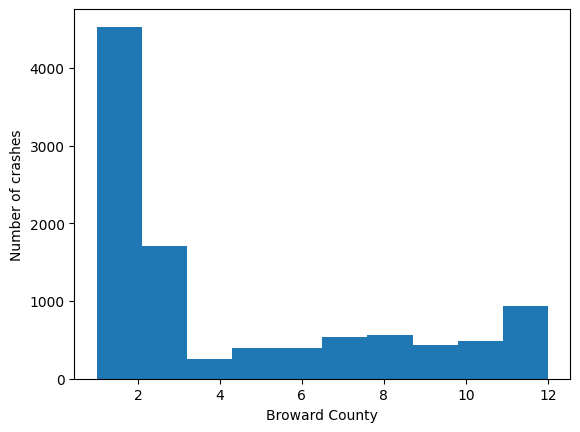

In [17]:
df_mb = df1[df1['COUNTY_TXT']== "BROWARD"]
plt.hist(df_mb["month"])
plt.ylabel("Number of crashes")
plt.xlabel("Broward County")

1(c.3): Histogram for Palm Beach County.

Text(0.5, 0, 'Palm BeachCounty')

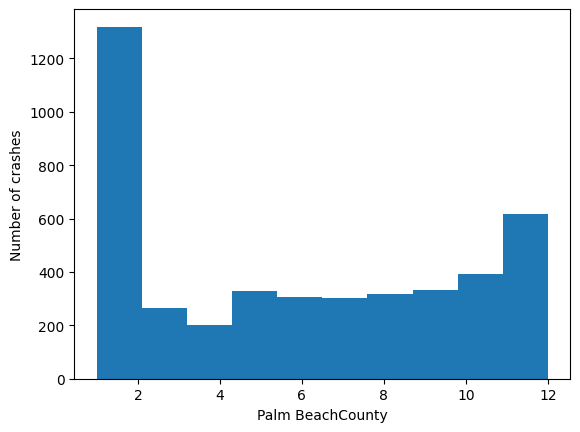

In [18]:
df_mpb = df1[df1['COUNTY_TXT']== "PALM BEACH"]
plt.hist(df_mpb["month"])
plt.ylabel("Number of crashes")
plt.xlabel("Palm BeachCounty")

### 1(d): Sample statistics by county

1(d.1): Sample statistics for Miami-Dade County:

In [19]:
number_crashes_per_month_MD = df_mdc["month"].value_counts()
mean_value_MD = number_crashes_per_month_MD.mean()
median_value_MD = number_crashes_per_month_MD.median()
quartiles_MD = number_crashes_per_month_MD.quantile([0.25, 0.5, 0.75])
std_deviation_MD = number_crashes_per_month_MD.std()

# Display the results
print("Mean:", mean_value_MD)
print("Median:", median_value_MD)
print("Quartiles:")
print(quartiles_MD)
print("Standard Deviation:", std_deviation_MD)


Mean: 2318.0833333333335
Median: 2616.0
Quartiles:
0.25    1367.50
0.50    2616.00
0.75    2860.75
Name: month, dtype: float64
Standard Deviation: 1394.0173116398216


1(d.2): Sample statistics for Broward County:

In [20]:
number_crashes_per_month_BC = df_mb["month"].value_counts()
mean_value_BC = number_crashes_per_month_BC.mean()
median_value_BC = number_crashes_per_month_BC.median()
quartiles_BC = number_crashes_per_month_BC.quantile([0.25, 0.5, 0.75])
std_deviation_BC = number_crashes_per_month_BC.std()

# Display the results
print("Mean:", mean_value_BC)
print("Median:", median_value_BC)
print("Quartiles:")
print(quartiles_BC)
print("Standard Deviation:", std_deviation_BC)


Mean: 852.8333333333334
Median: 477.0
Quartiles:
0.25    425.0
0.50    477.0
0.75    845.5
Name: month, dtype: float64
Standard Deviation: 765.2278131776222


1(d.3): Sample statistics for Palm Beach County:

In [21]:
number_crashes_per_month_MD = df_mpb["month"].value_counts()
mean_value_MD = number_crashes_per_month_MD.mean()
median_value_MD = number_crashes_per_month_MD.median()
quartiles_MD = number_crashes_per_month_MD.quantile([0.25, 0.5, 0.75])
std_deviation_MD = number_crashes_per_month_MD.std()

# Display the results
print("Mean:", mean_value_MD)
print("Median:", median_value_MD)
print("Quartiles:")
print(quartiles_MD)
print("Standard Deviation:", std_deviation_MD)

Mean: 365.5
Median: 324.0
Quartiles:
0.25    295.50
0.50    324.00
0.75    344.25
Name: month, dtype: float64
Standard Deviation: 196.55602948592733


### 1(e): Findings

From the 3 histograms that have been plotted, it is observed that the populations have a right skewed distribution. The summary statistics reveal that Miami Dade County has the highest mean number of crashes per month.

# Question 2

Our dataset also includes fields for injury severity level, speeding indication, and an aggressive driving indicator.

For this question we are going to investigate the relationship between the factors of whether somebody was speeding, driving agressively, or neither and the injury severity level for those crashes. To investigate and report our findings we will create a scatterplot comparing the crashes where drivers were speeding, where agressive driving was involved, and where neither were involved.We will then calculate sample statistics of the number of seriosuly injured people for each of the three factors.

> Note: We will have to check the [Fields & Codes](https://gis.fdot.gov/ssogis/docs/MapCodeTableDefinitions.xlsx) file to check what our numbers in the injury severity column correspond to.

```
Fields:
  - Injury Severity Level (INJSEVER)
  - Speeding Indicator (SPEEDING_IND)
  - Agressive Driving Indicator (AGGRESSIVE_DRIVING_IND)
  - Speeding or Agressive Driving Indicator (SPEEDING_AGGRESSIVE_IND)
  - Number of Seriously Injured (NUMBER_OF_SERIOUS_INJURIES)
```
2(a): Create a bar chart that compares injury severity levels for the three crash factors: speeding involved, aggressive driving involved, no speeding or agressive driving involved. (All three factors should be represented on the same scatterplot)

2(b): Calculate the mean, median, mode, and range for each of the three factors.

2(c): Report your findings based on the bar chart. How do these factors appear to affect the injury severity level of the crashes? Are these findings supported by your sample statistics?

## Answers & Code

### 2(a): Scatterplot for injury severity and related factors

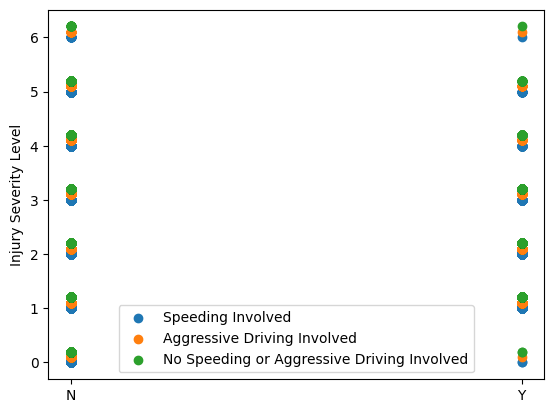

In [22]:
plt.scatter(df1["SPEEDING_IND"], df1["INJSEVER"], label='Speeding Involved')

# Scatter plot for Aggressive Driving Involved with a small y-offset
plt.scatter(df1["AGGRESSIVE_DRIVING_IND"], np.array(df1["INJSEVER"]) + 0.1, label='Aggressive Driving Involved')

# Scatter plot for No Speeding or Aggressive Driving Involved with a small y-offset
plt.scatter(df1["SPEEDING_AGGRESSIVE_IND"], np.array(df1["INJSEVER"]) + 0.2, label='No Speeding or Aggressive Driving Involved')

# Adding labels and title
plt.ylabel('Injury Severity Level')
plt.title('')

# Adding legend
plt.legend()

# Show the plot
plt.show()

### 2(b): Sample statistics for each group

2(b.1): Sample statistics for the number of seriously injured where speeding was involved.

In [23]:
dfspeed = df1[df1["SPEEDING_IND"] == "Y"]
number_serious_injured = dfspeed["INJSEVER"].value_counts()
# list_number_serious_injured = number_serious_injured.tolist()

mean_injsever = number_serious_injured.mean()
median_injsever = number_serious_injured.median()
mode_injsever = number_serious_injured.mode().tolist()
range_injsever = number_serious_injured.max() - number_serious_injured.min()

print("Mean:", mean_injsever)
print("Median:", median_injsever)
print("Mode:", mode_injsever)
print("Range:", range_injsever)



Mean: 140.14285714285714
Median: 65.0
Mode: [1, 2, 29, 65, 115, 186, 583]
Range: 582


2(b.2): Sample statistics for the number of serious injuries where aggressive driving was involved.

In [24]:
dfspeed2 = df1[df1["AGGRESSIVE_DRIVING_IND"] == "Y"]
number_serious_injured = dfspeed2["INJSEVER"].value_counts()

mean_injsever = number_serious_injured.mean()
median_injsever = number_serious_injured.median()
mode_injsever = number_serious_injured.mode().tolist()
range_injsever = number_serious_injured.max() - number_serious_injured.min()

print("Mean:", mean_injsever)
print("Median:", median_injsever)
print("Mode:", mode_injsever)
print("Range:", range_injsever)



Mean: 109.71428571428571
Median: 68.0
Mode: [1]
Range: 419


2(b.3): Sample statistics for the number of seriously injured where neither speeding nor aggressive driving was involved.

In [25]:
dfspeed3 = df1[df1["SPEEDING_AGGRESSIVE_IND"] == "N"]
number_serious_injured = dfspeed3["INJSEVER"].value_counts()

mean_injsever = number_serious_injured.mean()
median_injsever = number_serious_injured.median()
mode_injsever = number_serious_injured.mode().tolist()
range_injsever = number_serious_injured.max() - number_serious_injured.min()

print("Mean:", mean_injsever)
print("Median:", median_injsever)
print("Mode:", mode_injsever)
print("Range:", range_injsever)



Mean: 5841.285714285715
Median: 1341.0
Mode: [28, 399, 506, 1341, 3273, 6430, 28912]
Range: 28884


### 2(c): Findings

More injuries are recorded when there are high speeding of vehicles.

# Extra Credit

In the previous question, we investigated the differences between the sample statistics of the number of seriously injured in crashes where speeding, aggressive driving, or neither were involved. In this extra credit question, we will investigate three more factors using sample statistics and box plots.

```
Factors:
  - Number of Seriously Injured (NUMBER_OF_SERIOUS_INJURIES)
  - Seatbelt Indicator (NO_BELT_IND)
  - Impaired Driver Indicator (IMPAIRED_DRIVER_IND)
  - Distracted Driver Indicator (DISTRACTED_DRIVER_IND)
```

1. Calculate the five-point summaries for the number of serious injuries per each designation (Y/N) in the groups.

  (a) Seatbelt Indicator

  (b) Impaired Driver Indicator

  (c) Distracted Driver Indicator

2. Make side-by-side boxplots comparing the sample statistics of each designation (Y/N) in the groups.

  (a) Seatbelt Indicator

  (b) Impaired Driver Indicator
  
  (c) Distracted Driver Indicator

3. State your findings on whether the designations indicate any change in the number of seriosuly injured in each group.

  (a) Seatbelt Indicator

  (b) Impaired Driver Indicator
  
  (c) Distracted Driver Indicator


## Answers & Code

### **Seatbelt Indicator**

#### 1(a): Seatbelt indicator five-point summaries


---



1(a.1): Seatbelt designation - Yes

1(a.2): Seatbelt designation - No

#### 2(a): Seatbelt indicator boxplots

#### 3(a): Findings

> Write your findings here

### **Impaired Driver Indicator**

#### 1(b): Impaired driver indicator five-point summaries


---



1(b.1): Impaired driver designation - Yes

1(b.2): Impaired driver designation - No

#### 2(b): Impaired driver indicator boxplots

#### 3(b): Findings




> Write your findings here

### **Distracted Driver Indicator**

#### 1(c): Distracted driver indicator five-point summaries


---



1(c.1): Distracted driver driver designation - Yes

1(c.2): Distracted driver driver designation - No

#### 2(c): Distracted driver driver indicator boxplots

#### 3(c): Findings

> Write your findings here